In [1]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

px.set_mapbox_access_token('pk.eyJ1IjoiYWxleGFuZHJ1YnVidXJ1emFuIiwiYSI6ImNsMHRzM2g4OTBvbDMzam5tNjh1NjI1ZjgifQ.z7FS1JsvlJhjqCfu1CnRdQ')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
def set_seed(SEED):
    os.environ['PYTHONHASHSEED'] = str(SEED)
    random.seed(SEED)
    np.random.seed(SEED)

In [4]:
df = pd.read_csv('/content/drive/MyDrive/ml-plus-msg/raw_data/stops_fix_fips.csv')

<ipython-input-4-f4697d5f11c4>:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/ml-plus-msg/raw_data/stops_fix_fips.csv')


In [5]:
df_pop = pd.read_csv('/content/drive/MyDrive/ml-plus-msg/raw_data/philadelphia_population_metrics_coords.csv')

In [6]:
df_pop

fips        lat        lng  COUNT_ALL_RACES_ETHNICITIES  \
0    42101000100  39.951517 -75.146664                       3478.0   
1    42101000200  39.955618 -75.156031                       2937.0   
2    42101000300  39.956755 -75.168328                       3169.0   
3    42101000401  39.953899 -75.174938                       2125.0   
4    42101000402  39.953136 -75.167186                       3142.0   
..           ...        ...        ...                          ...   
376  42101980300  40.083849 -75.007891                          2.0   
377  42101980700  39.918671 -75.147266                          5.0   
378  42101980800  39.970298 -75.253865                          6.0   
379  42101980900  39.905133 -75.219103                         30.0   
380  42101989100  40.038968 -75.007105                       7765.0   

     COUNT_WHITE_NH  COUNT_BLACK_NH  COUNT_ASIAN_NH  COUNT_HISPANIC  \
0            2890.0           207.0           173.0           126.0   
1             665.0           284.0          1855.0            79.0   
2            2290.0           324.0           328.0           135.0   
3            1049.0           376.0           519.0           107.0   
4            2455.0           173.0           356.0           109.0   
..              ...             ...             ...             ...   
376             2.0             0.0             0.0             0.0   
377             0.0             3.0             1.0             1.0   
378             4.0             1.0             0.0             0.0   
379             9.0            18.0             0.0             2.0   
380           975.0          5469.0            51.0          1231.0   

     PERCENT_WHITE_NH  PERCENT_BLACK_NH  PERCENT_ASIAN_NH  PERCENT_HISPANIC  
0           83.093732          5.951696          4.974123          3.622772  
1           22.642152          9.669731         63.159687          2.689820  
2           72.262543         10.224045         10.350268          4.260019  
3           49.364706         17.694118         24.423529          5.035294  
4           78.134946          5.506047         11.330363          3.469128  
..                ...               ...               ...               ...  
376        100.000000          0.000000          0.000000          0.000000  
377          0.000000         60.000000         20.000000         20.000000  
378         66.666667         16.666667          0.000000          0.000000  
379         30.000000         60.000000          0.000000          6.666667  
380         12.556343         70.431423          0.656793         15.853187  

[381 rows x 12 columns]

In [10]:
race = ['black', 'white', 'hispanic', 'asian/pacific islander']

In [29]:
df_pop.sample(10000, replace=True)

fips        lat        lng  COUNT_ALL_RACES_ETHNICITIES  \
306  42101033101  40.038895 -75.038617                       4913.0   
281  42101030502  40.044032 -75.103887                       5839.0   
149  42101015600  39.979196 -75.141081                       1741.0   
174  42101017702  39.993941 -75.123769                       5076.0   
182  42101019000  40.007140 -75.099601                       7543.0   
..           ...        ...        ...                          ...   
301  42101032300  40.021528 -75.051903                       3835.0   
138  42101014300  39.969769 -75.128915                       1439.0   
46   42101003901  39.924321 -75.172308                       6062.0   
18   42101001202  39.945875 -75.167858                       5137.0   
378  42101980800  39.970298 -75.253865                          6.0   

     COUNT_WHITE_NH  COUNT_BLACK_NH  COUNT_ASIAN_NH  COUNT_HISPANIC  \
306          4259.0           158.0           147.0           291.0   
281          1180.0          3050.0           404.0          1070.0   
149           209.0           373.0            23.0          1109.0   
174           468.0           876.0           125.0          3535.0   
182          1296.0          1559.0           342.0          4209.0   
..              ...             ...             ...             ...   
301          2105.0           889.0            86.0           647.0   
138          1188.0            62.0            53.0           103.0   
46           3886.0           564.0          1103.0           384.0   
18           4131.0           283.0           319.0           262.0   
378             4.0             1.0             0.0             0.0   

     PERCENT_WHITE_NH  PERCENT_BLACK_NH  PERCENT_ASIAN_NH  PERCENT_HISPANIC  
306         86.688378          3.215958          2.992062          5.923061  
281         20.208940         52.234972          6.918993         18.325056  
149         12.004595         21.424469          1.321080         63.699024  
174          9.219858         17.257683          2.462569         69.641450  
182         17.181493         20.668169          4.534005         55.800080  
..                ...               ...               ...               ...  
301         54.889179         23.181226          2.242503         16.870926  
138         82.557331          4.308548          3.683113          7.157748  
46          64.104256          9.303860         18.195315          6.334543  
18          80.416586          5.509052          6.209850          5.100253  
378         66.666667         16.666667          0.000000          0.000000  

[10000 rows x 12 columns]

In [53]:
df_no_black = df[~(df['subject_race'] == 'black')]
df_black = df[df['subject_race'] == 'black']

undersample_dfs = []

In [54]:
for fip in df_pop['fips']:
    cnt = df[df['fips'] == fip].loc[:, ['objectid', 'subject_race']].groupby('subject_race').count()
    ratio_stops = cnt.loc['black', 'objectid'] / cnt.loc['white', 'objectid']
    idx = df_pop[df_pop['fips'] == fip].index[0]
    ratio = (df_pop.loc[idx, 'COUNT_BLACK_NH'] / df_pop.loc[idx, 'COUNT_WHITE_NH'])

    if ratio > ratio_stops:
        ratio = ratio_stops

    samples = int(cnt.loc['white', 'objectid'] * ratio)
    undersample_dfs.append(df_black[df_black['fips'] == fip].sample(samples))

<ipython-input-54-7d7f22108534>:5: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = (df_pop.loc[idx, 'COUNT_BLACK_NH'] / df_pop.loc[idx, 'COUNT_WHITE_NH'])


In [56]:
undersample_dfs.append(df_no_black)

In [59]:
df_sample = pd.concat(undersample_dfs)

In [61]:
set_seed(1337)
px.density_mapbox(df.sample(30000), lat='lat', lon='lng', radius=2, zoom=10)

In [62]:
set_seed(1337)
px.density_mapbox(df_sample.sample(30000), lat='lat', lon='lng', radius=2, zoom=10)

In [64]:
df_sample

Unnamed: 0  objectid        date      time  \
749138       829571    829572  2015-10-20  22:25:00   
553557       591819    591820  2015-05-05  01:58:00   
1544382     1645023   1645024  2017-09-15  08:00:00   
1213887     1307218   1307219  2016-11-11  13:25:00   
49627         52690     52691  2014-03-15  23:00:00   
...             ...       ...         ...       ...   
1760381     1865078   1865079  2018-04-14  21:20:00   
1760382     1865079   1865080  2018-04-14  21:20:00   
1760385     1865082   1865083  2018-04-14  21:25:00   
1760391     1865088   1865089  2018-04-14  21:30:00   
1760395     1865092   1865093  2018-04-14  22:01:00   

                            location        lat        lng  district  \
749138             0 BLOCK S 02ND ST  39.949905 -75.143689       6.0   
553557             400 BLOCK ARCH ST  39.952344 -75.146867       6.0   
1544382          100 BLOCK N 04TH ST  39.952410 -75.146860       6.0   
1213887         5200 BLOCK N 05TH ST  39.954390 -75.148130      35.0   
49627              0 BLOCK S 02ND ST  39.949914 -75.143690       6.0   
...                              ...        ...        ...       ...   
1760381              3100 BLOCK F ST  39.995440 -75.117790      24.0   
1760382              3100 BLOCK F ST  39.995440 -75.117790      24.0   
1760385      1100 BLOCK CARPENTER ST  39.938350 -75.161190       3.0   
1760391  1400 BLOCK CECIL B MOORE AV  39.978670 -75.157960      22.0   
1760395         2600 BLOCK JUDSON ST  39.998240 -75.175190      39.0   

        service_area  subject_age  ... outcome contraband_found  \
749138           063         51.0  ...     NaN              NaN   
553557           062         21.0  ...     NaN              NaN   
1544382          061         36.0  ...     NaN              NaN   
1213887          352         47.0  ...     NaN              NaN   
49627            062         32.0  ...     NaN              NaN   
...              ...          ...  ...     ...              ...   
1760381          242         34.0  ...     NaN              NaN   
1760382          242         36.0  ...     NaN              NaN   
1760385          031         30.0  ...     NaN              NaN   
1760391          221         41.0  ...     NaN              NaN   
1760395          393         33.0  ...     NaN              NaN   

        frisk_performed  search_conducted search_person search_vehicle  \
749138            False             False         False          False   
553557            False             False         False          False   
1544382           False             False         False          False   
1213887           False             False         False          False   
49627             False             False         False          False   
...                 ...               ...           ...            ...   
1760381           False             False         False          False   
1760382           False             False         False          False   
1760385           False             False         False          False   
1760391           False             False         False          False   
1760395           False             False         False          False   

                   raw_race  raw_individual_contraband  \
749138   Black - Non-Latino                      False   
553557   Black - Non-Latino                      False   
1544382  Black - Non-Latino                      False   
1213887  Black - Non-Latino                      False   
49627    Black - Non-Latino                      False   
...                     ...                        ...   
1760381  White - Non-Latino                      False   
1760382  White - Non-Latino                      False   
1760385             Unknown                      False   
1760391      White - Latino                      False   
1760395               Asian                      False   

         raw_vehicle_contraband         fips  
749138                    False  42101000100 

In [66]:
df_sample

Unnamed: 0  objectid        date      time  \
749138       829571    829572  2015-10-20  22:25:00   
553557       591819    591820  2015-05-05  01:58:00   
1544382     1645023   1645024  2017-09-15  08:00:00   
1213887     1307218   1307219  2016-11-11  13:25:00   
49627         52690     52691  2014-03-15  23:00:00   
...             ...       ...         ...       ...   
1760381     1865078   1865079  2018-04-14  21:20:00   
1760382     1865079   1865080  2018-04-14  21:20:00   
1760385     1865082   1865083  2018-04-14  21:25:00   
1760391     1865088   1865089  2018-04-14  21:30:00   
1760395     1865092   1865093  2018-04-14  22:01:00   

                            location        lat        lng  district  \
749138             0 BLOCK S 02ND ST  39.949905 -75.143689       6.0   
553557             400 BLOCK ARCH ST  39.952344 -75.146867       6.0   
1544382          100 BLOCK N 04TH ST  39.952410 -75.146860       6.0   
1213887         5200 BLOCK N 05TH ST  39.954390 -75.148130      35.0   
49627              0 BLOCK S 02ND ST  39.949914 -75.143690       6.0   
...                              ...        ...        ...       ...   
1760381              3100 BLOCK F ST  39.995440 -75.117790      24.0   
1760382              3100 BLOCK F ST  39.995440 -75.117790      24.0   
1760385      1100 BLOCK CARPENTER ST  39.938350 -75.161190       3.0   
1760391  1400 BLOCK CECIL B MOORE AV  39.978670 -75.157960      22.0   
1760395         2600 BLOCK JUDSON ST  39.998240 -75.175190      39.0   

        service_area  subject_age  ... outcome contraband_found  \
749138           063         51.0  ...     NaN              NaN   
553557           062         21.0  ...     NaN              NaN   
1544382          061         36.0  ...     NaN              NaN   
1213887          352         47.0  ...     NaN              NaN   
49627            062         32.0  ...     NaN              NaN   
...              ...          ...  ...     ...              ...   
1760381          242         34.0  ...     NaN              NaN   
1760382          242         36.0  ...     NaN              NaN   
1760385          031         30.0  ...     NaN              NaN   
1760391          221         41.0  ...     NaN              NaN   
1760395          393         33.0  ...     NaN              NaN   

        frisk_performed  search_conducted search_person search_vehicle  \
749138            False             False         False          False   
553557            False             False         False          False   
1544382           False             False         False          False   
1213887           False             False         False          False   
49627             False             False         False          False   
...                 ...               ...           ...            ...   
1760381           False             False         False          False   
1760382           False             False         False          False   
1760385           False             False         False          False   
1760391           False             False         False          False   
1760395           False             False         False          False   

                   raw_race  raw_individual_contraband  \
749138   Black - Non-Latino                      False   
553557   Black - Non-Latino                      False   
1544382  Black - Non-Latino                      False   
1213887  Black - Non-Latino                      False   
49627    Black - Non-Latino                      False   
...                     ...                        ...   
1760381  White - Non-Latino                      False   
1760382  White - Non-Latino                      False   
1760385             Unknown                      False   
1760391      White - Latino                      False   
1760395               Asian                      False   

         raw_vehicle_contraband         fips  
749138                    False  42101000100 

In [68]:
temp_df = df_sample[['date','objectid', 'subject_race']]
temp_df['date'] = temp_df['date'].apply(lambda x: x[:7])
temp_df = temp_df.groupby(['date', 'subject_race']).count().sort_values('objectid', ascending=False).reset_index()
temp_df.rename(columns={'objectid':'total'}, inplace=True)

fig = px.bar(temp_df, x="date", y="total", color="subject_race", title="Monthly stops given subject race")

fig.update_layout(
    xaxis_title="Date", yaxis_title="Total stops"
)

fig.show()

<ipython-input-68-1b074005a2f0>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [70]:
set_seed(1337)
px.density_mapbox(df_sample.sample(30000), lat='lat', lon='lng', radius=3, zoom=10)

In [71]:
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.stats import multivariate_normal

In [86]:
# empirically determined tried elbow, silouhette
NUM_CLUSTERS = 25

In [87]:
df = df_sample.sample(30000)

In [95]:
x = df.lng.values
y = df.lat.values

x_min = x.min()
y_min = y.min()
x_scale = 9518 / (x.max() - x.min())
y_scale = 9426 / (y.max() - y.min())

x = (x - x.min()) / (x.max() - x.min()) * 3000
y = (y - y.min()) / (y.max() - y.min()) * 3000

In [96]:
points = np.stack([x, y]).T

In [97]:
points.shape

(30000, 2)

In [98]:
kmeans = KMeans(n_clusters=NUM_CLUSTERS, random_state=0).fit(points)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



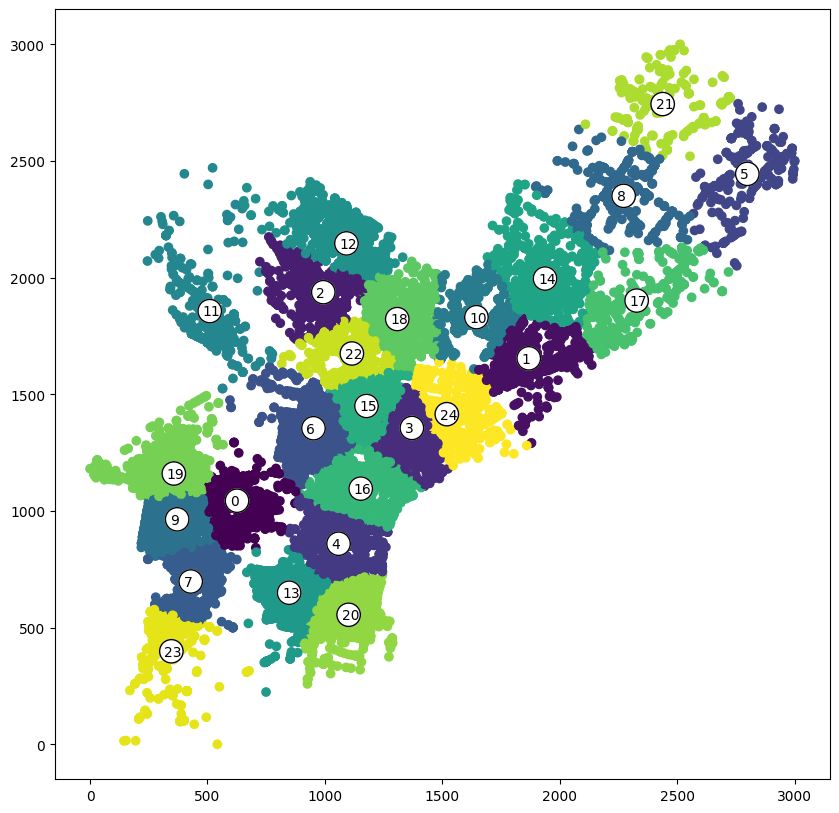

In [103]:
plt.figure(figsize=(10, 10))
plt.scatter(points[:, 0], points[:, 1], c=kmeans.labels_)

for i, c in enumerate(kmeans.cluster_centers_):
    draw_circle = plt.Circle(c, 50, color='white')
    plt.gcf().gca().add_artist(draw_circle)
    draw_circle = plt.Circle(c, 50, fill=False)
    plt.gcf().gca().add_artist(draw_circle)
    plt.text(c[0] - 30, c[1] - 20, str(i), fontsize=10)

# plt.savefig('images/normalized_clustering_numbered.jpg', bbox_inches='tight')
plt.show()

In [104]:
distr = []
X, Y = np.meshgrid(np.linspace(0, x.max(), num=100), np.linspace(0, y.max(), num=100))
max_val = 0

In [106]:
for c in range(NUM_CLUSTERS):
    cov = np.cov(points[kmeans.labels_ == c].T)
    mean = kmeans.cluster_centers_[c]
    distr.append(multivariate_normal(cov=cov, mean=mean, seed=0))

    if max_val < distr[-1].pdf(mean):
        max_val = distr[-1].pdf(mean)

In [107]:
# Generating the density function for each point in the meshgrid
pdf = np.zeros(X.shape)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        pdf[i,j] = sum([distr[t].pdf([X[i,j], Y[i,j]]) for t in range(NUM_CLUSTERS)])

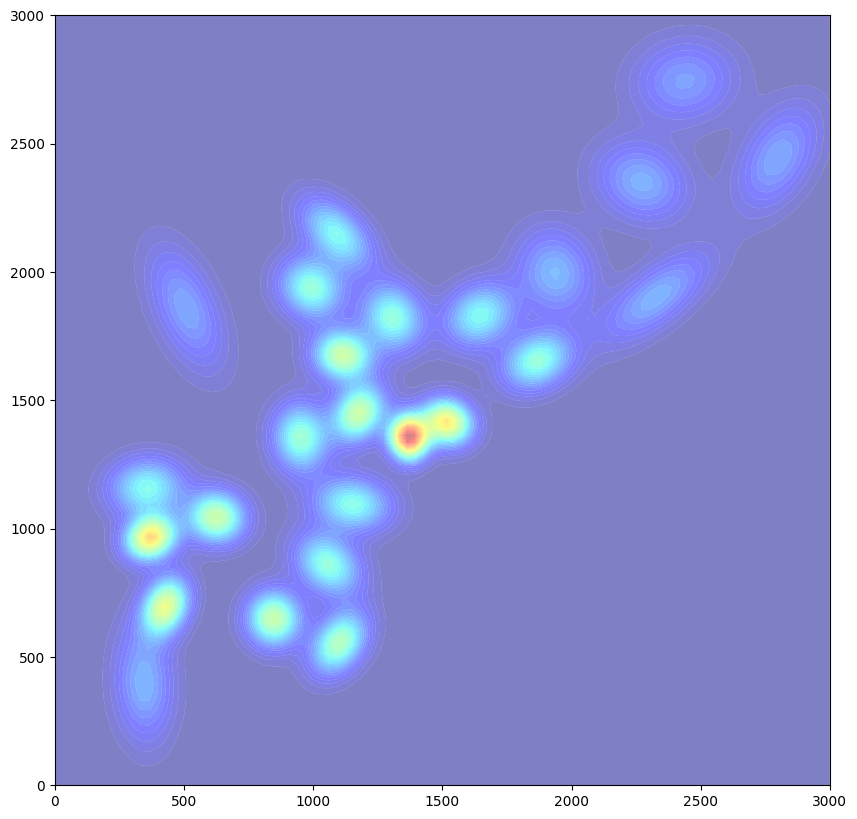

In [115]:
fig = plt.figure(figsize=(10, 10))

cmap = plt.get_cmap('jet')
pp = plt.contourf(X, Y, pdf,cmap=cmap, alpha=.5, antialiased=True, levels=50)
# plt.scatter(points[:, 0], points[:, 1], c=kmeans.labels_, s=1)
plt.show()

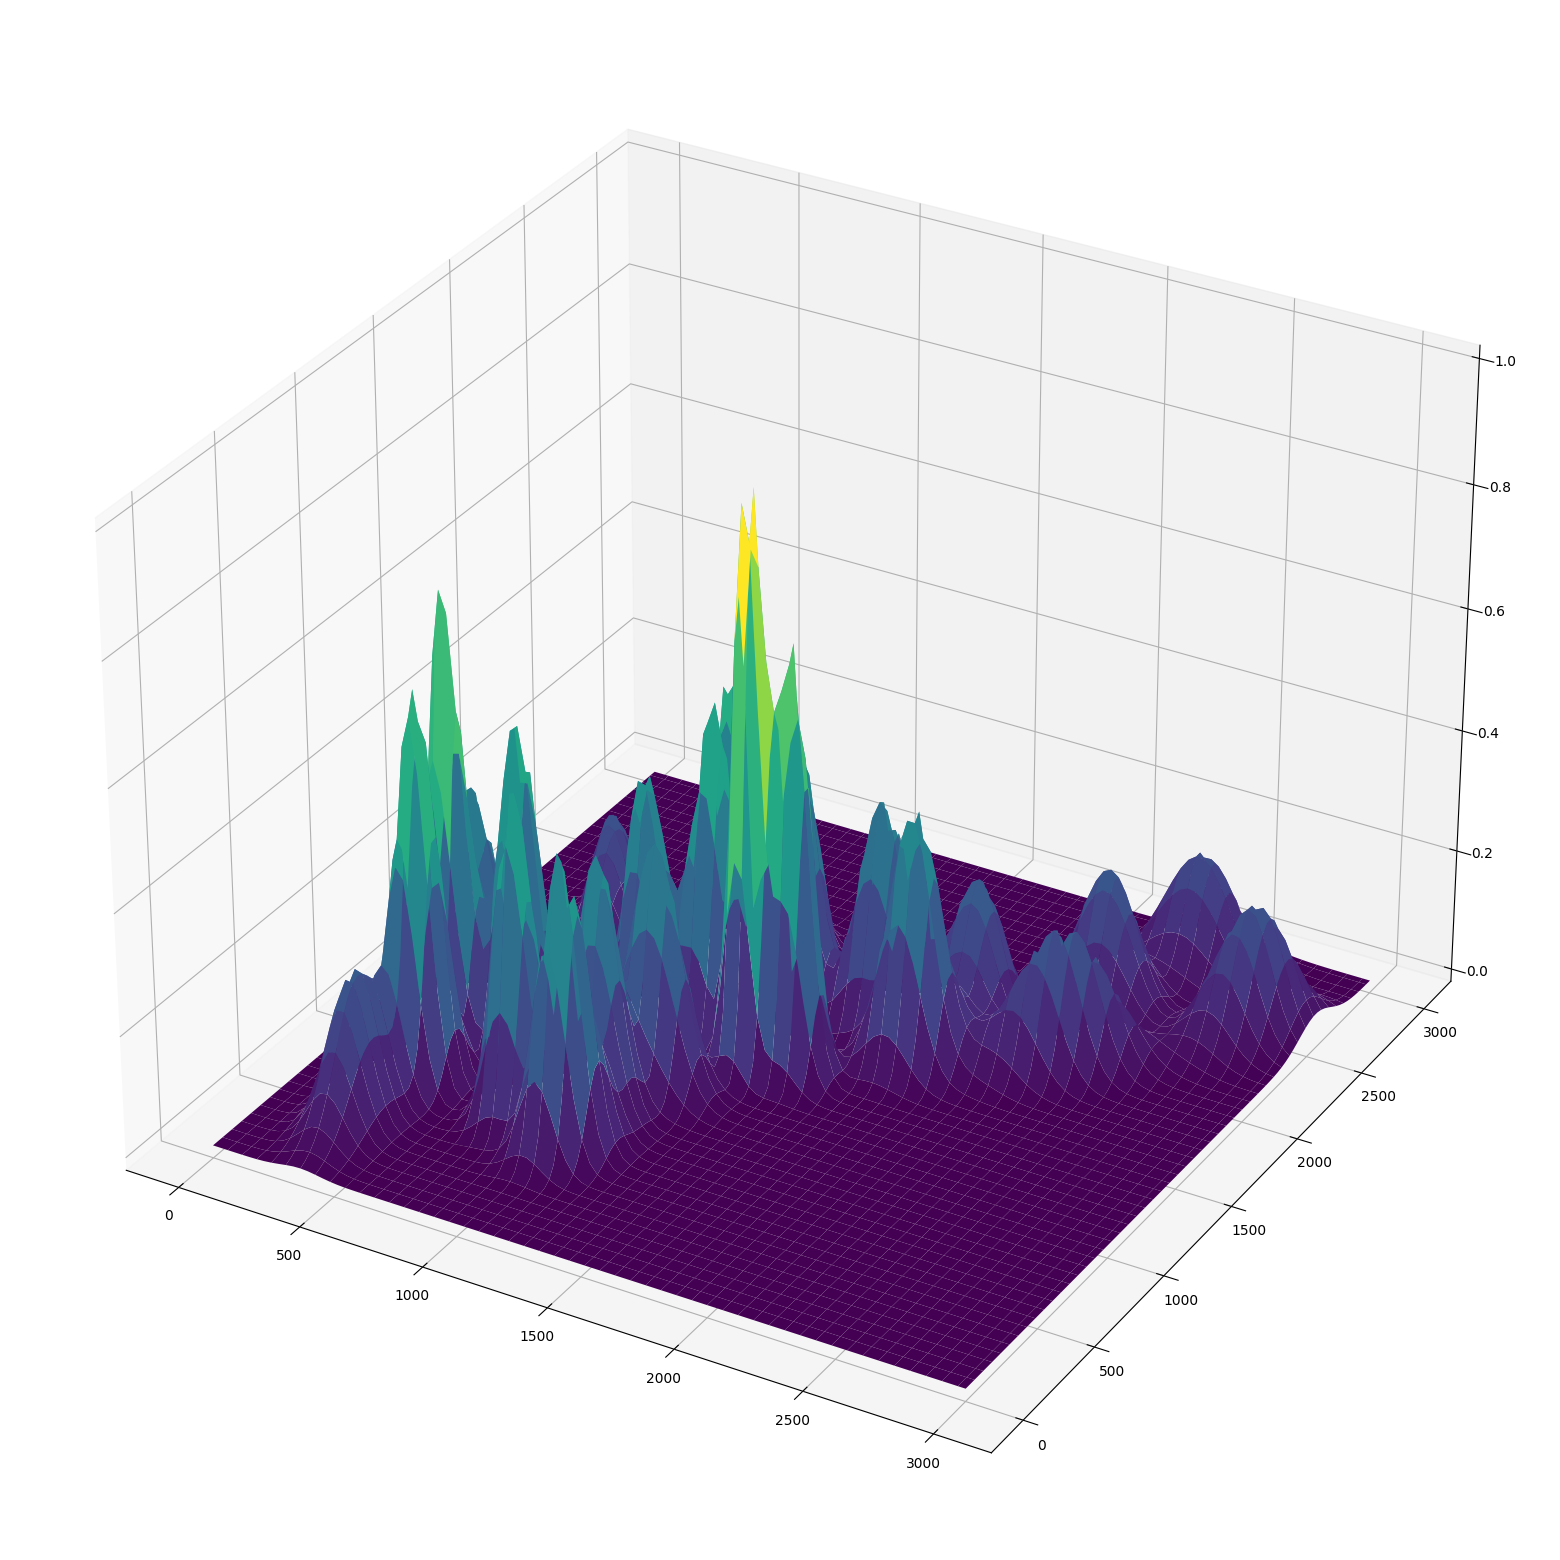

In [109]:
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, pdf / pdf.max(), cmap='viridis')

In [ ]:

precalc = np.zeros((1000, 1000))

In [120]:
for i in range(100):
    if i % 10 == 0:
        print(i)
    for j in range(100):
        precalc[i, j] = sum([distr[t].pdf([i * 10, j * 10]) for t in range(NUM_CLUSTERS)])

0
10
20
30
40
50
60
70
80
90


In [121]:

import pickle

with open('/content/drive/MyDrive/ml-plus-msg/raw_data/distribution_k25_precalc.obj', 'wb') as f:
    pickle.dump((distr, max_val, x_min, x_scale, y_min, y_scale, precalc), f)

In [122]:
!pip install osmnx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 KB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 57.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 31.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 43.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 33.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 55.6 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.27.1
    Uninstalling requests-2.27.1:
      Successfully uninstalled requests-2.27.1
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
  Attempting uninstall: pa

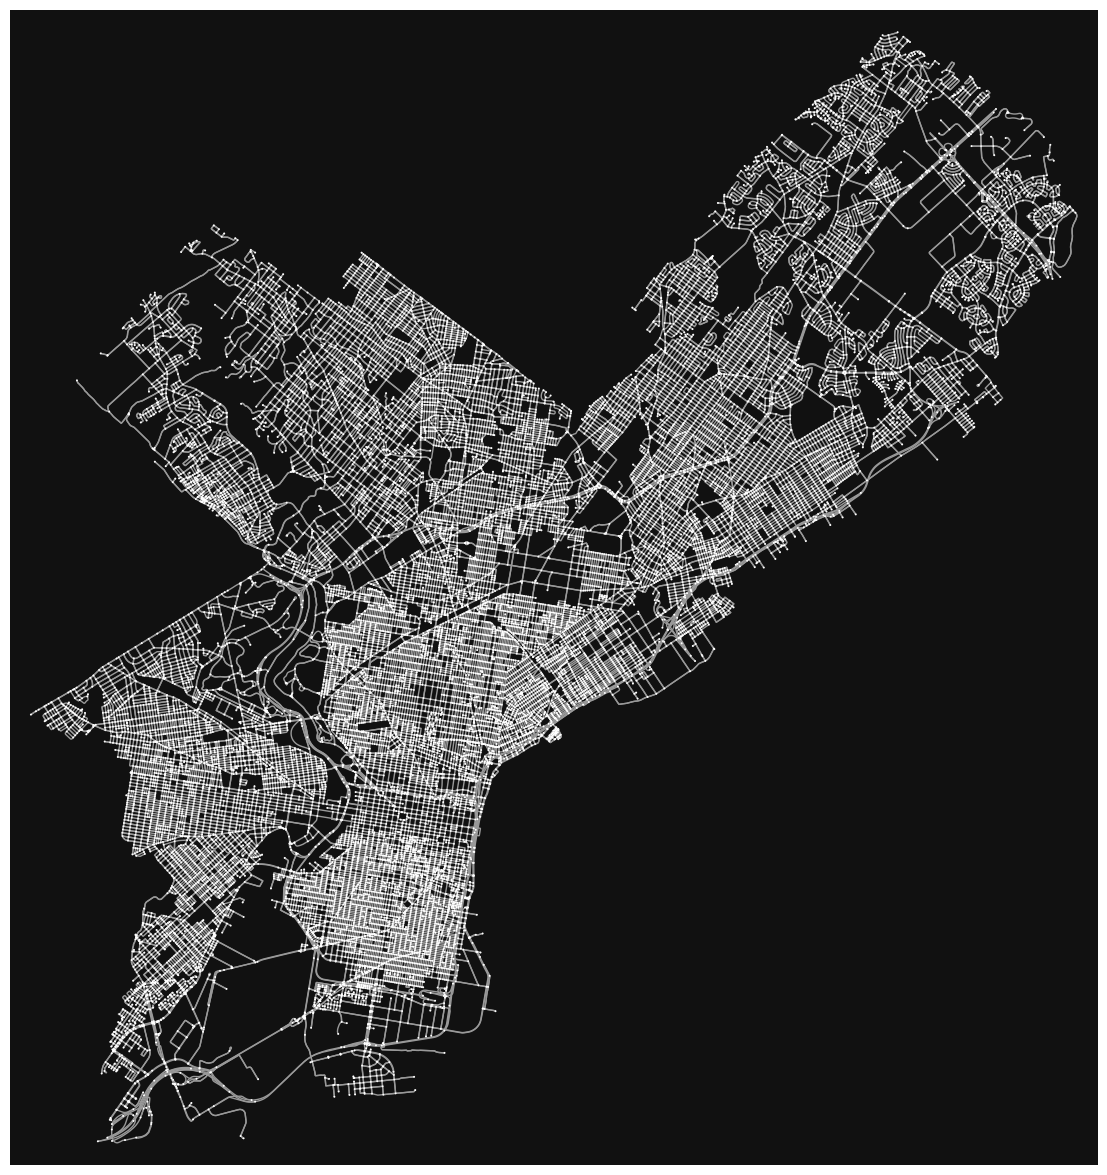

(<Figure size 1500x1500 with 1 Axes>, <Axes: >)

In [123]:
import osmnx as ox
G = ox.graph_from_place('Philadelphia, Philadelphia County, Pennsylvania, United States', network_type='drive')
ox.plot_graph(G, figsize=(15, 15), node_size=2)

In [137]:
import pickle
import math
import numpy as np
import osmnx as ox
import networkx as nx
import multiprocessing
from typing import List, Tuple, Dict
import time

Point = Tuple[float, float]

pdf_time = 0

def dist(p1 : Point, p2 : Point) -> float:
    """Euclidian distance between p1 and p2"""
    return math.sqrt((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2)


class MultimodalDistribution():
    def __init__(
        self,
    ) -> None:

        with open('/content/drive/MyDrive/ml-plus-msg/raw_data/distribution_k25_precalc.obj', 'rb') as f:
            self.distr_list, self.norm_factor, self.x_min, self.x_scale, self.y_min, self.y_scale, self.precalc = pickle.load(f)

    def pdf_precalc(self, point : Point) -> float:
        return self.precalc[tuple(np.round(point / 10).astype(int))] / self.norm_factor
    
    def riemann_sum(self, point1: Point, point2: Point, segment_len : int = 1000) -> float:
        # convert from long, lat to x, y
        point1 = np.array([(point1[0] - self.x_min) * self.x_scale,
                           (point1[1] - self.y_min) * self.y_scale])
        point2 = np.array([(point2[0] - self.x_min) * self.x_scale,
                           (point2[1] - self.y_min) * self.y_scale])

        num_segments = int(dist(point1, point2) // segment_len)
        if num_segments == 0:
            return 0

        delta = (point2 - point1) / num_segments
        right_point = point1 + delta
        result = 0

        for _ in range(num_segments):
            a = time.time()
            result += self.pdf_precalc(right_point) * segment_len
            global pdf_time
            pdf_time += time.time() - a
            right_point += delta

        return result


class SaferWalkHandler():
    def __init__(
        self
    ) -> None:

        self.G = self._load_graph('/content/drive/MyDrive/ml-plus-msg/map/graph.graphml')
        self.cpus = multiprocessing.cpu_count()
        self.distr = MultimodalDistribution()
        self.memo = {}

    def predict(
        self,
        start_coords: Point,
        dest_coords: Point
    ) -> Tuple[float, Dict[str, List[float]]]:
        """
        (long, lat) (x, y)
        """
        results = {}

        if start_coords[1] < dest_coords[1]:
            start_coords, dest_coords = dest_coords, start_coords

        start_node, start_distance = self._get_closest_node_id(start_coords)
        dest_node, dest_distance = self._get_closest_node_id(dest_coords)

        # compute fastest route
        distance, route = self._compute_fastest_route(start_node, dest_node)
        # distance to the closest nodes in the street network
        distance += start_distance + dest_distance
        results['fastest'] = {
            'distance': distance,
            'ETA': round(distance / 78),
            'route': route
        }

        # compute safer route
        self.h_scale = distance / 100
        print('Scale heuristic by:', self.h_scale)
        distance, route = self._compute_astar_route(start_node, dest_node)
        # distance to the closest nodes in the street network
        distance += start_distance + dest_distance
        results['safer'] = {
            'distance': distance,
            'ETA': round(distance / 78),
            'route': route
        }
        global pdf_time
        print('pdf_time', pdf_time)

        return results

    def _id2coords(self, node_id: int) -> Point:
        node = self.G.nodes[node_id]
        point = [node['x'], node['y']]
        return point

    def _load_graph(self, file_path: str):
        return ox.io.load_graphml(file_path)

    def _get_closest_node_id(self, point: Point) -> Tuple[int, float]:
        return ox.distance.nearest_nodes(self.G, *point, return_dist=True)

    def heuristic(self, point1 : int, point2 : int) -> float:
        point1 = self._id2coords(point1)
        point2 = self._id2coords(point2)
        h = self.distr.riemann_sum(point1, point2) * self.h_scale

        return h

    def _process_route(self, route):
        distance = 0

        for i in range(len(route) - 1):
            node1, node2 = route[i], route[i + 1]
            edge_data = self.G.get_edge_data(node1, node2)
            # select shortest edge between the two nodes since G is a multigraph
            length = min([edge['length'] for edge in edge_data.values()])
            distance += length

        route = list(map(self._id2coords, route))
        return distance, route

    def _compute_fastest_route(self, start_node: Point, dest_node: Point) -> Tuple[float, List[Point]]:
        route = ox.distance.shortest_path(self.G, start_node, dest_node, weight='length', cpus=self.cpus)
        distance, route = self._process_route(route)

        return distance, route

    def _compute_astar_route(self, start_node: Point, dest_node: Point) -> Tuple[float, List[Point]]:
        route = nx.astar_path(self.G, start_node, dest_node, self.heuristic, weight='length')
        distance, route = self._process_route(route)

        return distance, route

    def _compute_liniar_comb_dijkstra_route(self, start_node: Point, dest_node: Point) -> Tuple[float, List[Point]]:
        route = nx.dijkstra_path(self.G, start_node, dest_node, weight='liniar_comb_weight')
        distance, route = self._process_route(route)

        return distance, route

In [138]:
A = [40.013824, -75.081738][::-1]
B = [39.931201, -75.158443][::-1]

In [139]:
handler = SaferWalkHandler()

In [140]:
handler.predict(A, B)

Scale heuristic by: 128.01633056436174
pdf_time 0.7369165420532227


{'fastest': {'distance': 12801.633056436174,
  'ETA': 164,
  'route': [[-75.081685, 40.013549],
   [-75.082171, 40.013821],
   [-75.08264, 40.014098],
   [-75.083248, 40.013562],
   [-75.083891, 40.012988],
   [-75.08445, 40.012479],
   [-75.085101, 40.011473],
   [-75.084681, 40.011295],
   [-75.08475, 40.010392],
   [-75.0858654, 40.009848],
   [-75.086429, 40.010055],
   [-75.086876, 40.009329],
   [-75.0877791, 40.0079203],
   [-75.088677, 40.006512],
   [-75.0896988, 40.0063307],
   [-75.0899642, 40.0062828],
   [-75.090611, 40.0061624],
   [-75.0918265, 40.0060086],
   [-75.0927116, 40.005234],
   [-75.092791, 40.005168],
   [-75.0935041, 40.0045166],
   [-75.0943386, 40.0037569],
   [-75.094391, 40.003709],
   [-75.095088, 40.003083],
   [-75.095798, 40.002445],
   [-75.096136, 40.00213],
   [-75.0971936, 40.0011759],
   [-75.0977484, 40.0006801],
   [-75.098979, 39.999688],
   [-75.0996285, 39.9992768],
   [-75.100035, 39.9990076],
   [-75.1004232, 39.9987483],
   [-75.1008233,